In [0]:
 import pandas as pd
 import seaborn as sns
 from sklearn.cluster import KMeans
 import numpy as np 
 import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv')
data.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [0]:
data.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


checking whether data contains missing values or null values

In [0]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

visualizing for correlation

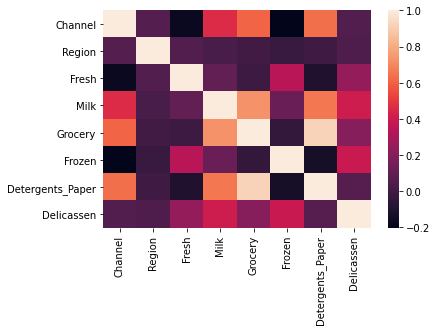

In [0]:
sns.heatmap(data.corr())

In [0]:
sns.pairplot(data)

The heatmap shows very high corelation between grocery and detergent paper that means one of them can be removed to reduce our feature. Also milk shows a fair amount of corelation with both of them.
but we wont drop it now for the sake of learning and ploting the pie chart for each feature.

But pairplot shows most of the data towards origin. so we might need to rescale the data.

In [0]:
trans_data = np.log(data)
sns.pairplot(trans_data)

clustering the data into 1 to 8 clusters

In [0]:
inertia=[]
for k in range(1,9):
  m = KMeans(k).fit(trans_data)
  inertia.append(m.inertia_)

<function matplotlib.pyplot.show>

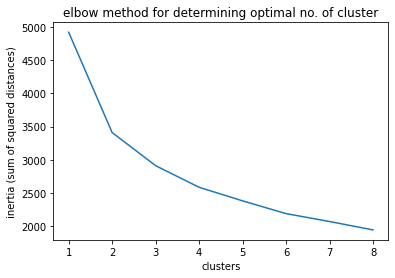

In [0]:
plt.plot(range(1,9),inertia)
plt.xlabel('clusters')
plt.ylabel('inertia (sum of squared distances)')
plt.title('elbow method for determining optimal no. of cluster')
plt.show

The optimal cluster would be 4 . building a final model with k=4

In [0]:
model= KMeans(4).fit(trans_data)

In [0]:
print("------model info -----")
print("no of cluster = 4")
print("Sum of squared error = " ,model.inertia_)
print(" ")
pred = model.predict(trans_data)
data['cluster'] = pred
print('Count in each cluster: \n', data['cluster'].value_counts())

------model info -----
no of cluster = 4
Sum of squared error =  2583.6980935669485
 
Count in each cluster: 
 3    140
2    124
1    109
0     67
Name: cluster, dtype: int64


**visualizing**

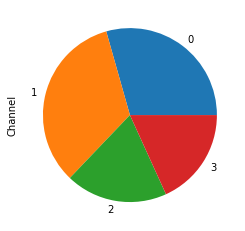

In [0]:
data.groupby('cluster').Channel.mean().plot(kind='pie')

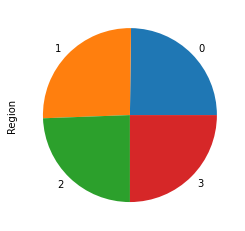

In [0]:
data.groupby('cluster').Region.mean().plot(kind='pie')

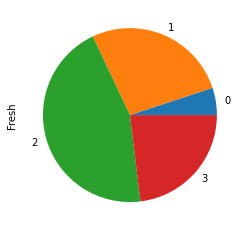

In [0]:
data.groupby('cluster').Fresh.mean().plot(kind='pie')

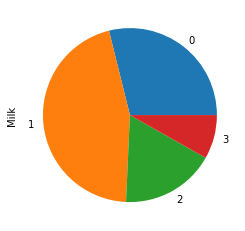

In [0]:
data.groupby('cluster').Milk.mean().plot(kind='pie')

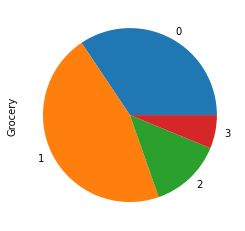

In [0]:
data.groupby('cluster').Grocery.mean().plot(kind='pie')

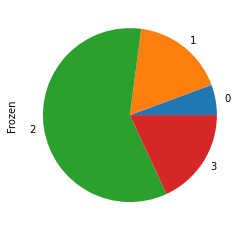

In [0]:
data.groupby('cluster').Frozen.mean().plot(kind='pie')

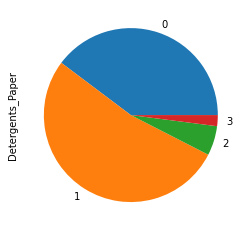

In [0]:
data.groupby('cluster').Detergents_Paper.mean().plot(kind='pie')

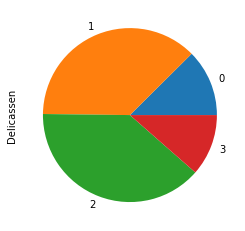

In [0]:
data.groupby('cluster').Delicassen.mean().plot(kind='pie')